<a href="https://colab.research.google.com/github/SighanoCel/My-data-science-project/blob/main/Cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Data Loading and Exploration

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
from sklearn.svm import SVC
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ROME BUSINESS DATA SCIENCE/Machine learning lecture/Final Assessment Module 3/The_Cancer_data_1500_V2.csv')

In [ ]:
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


### Reading the dataset glossary to understand the meaning of the features.

In [ ]:



with open ('/content/drive/MyDrive/ROME BUSINESS DATA SCIENCE/Machine learning lecture/Final Assessment Module 3/Cancer Data Glossary.txt','r') as f:

  print(f.read())


Data Description:
• It contains information about 1500 patients and likely includes the following features:
o Age: Patient's age (numerical value).
o Gender: Patient's gender (categorical, male/female – 0/1).
o BMI: Body Mass Index (numerical value).
o Smoking: Smoking habits (categorical, yes/no – 0/1).
o Genetic Risk: Genetic predisposition to cancer (categorical, possibly high/low/unknown, 0/1/2).
o Physical Activity: Level of physical activity (numerical).
o Alcohol Intake: Alcohol consumption habits (numerical).
o Cancer History: Prior history of cancer (categorical, possibly yes/no – 0/1).
• The target variable is Diagnosis, which indicates the type of cancer diagnosed for each patient (categorical, yes/no - 0/1).


### Exploring the shape and the information about the dataframe.

In [ ]:
print(f"The dataset contains {df.shape[0]} and {df.shape[1]} features")

print(df.info())

The dataset contains 1500 and 9 features
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB
None


### Searching for missing and duplicated values

In [ ]:

# This code helps to see if there are any missing and duplicated entries
# and what their summed values are.
# in this case we notice that the dataset don not contains such values,
# meaning that it has been already cleaned and processed.


print(df.isnull().sum())
print(df[df.duplicated()].sum())

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64
Age                 0.0
Gender              0.0
BMI                 0.0
Smoking             0.0
GeneticRisk         0.0
PhysicalActivity    0.0
AlcoholIntake       0.0
CancerHistory       0.0
Diagnosis           0.0
dtype: float64


### 2. Target Variable and Feature Selection

In [ ]:
# This line of code renames the column named 'Diagnosis' in the DataFrame df to 'target'.
# This is a common practice in machine learning workflows to clearly identify
# the target variable that your model will be trained to predict.


df= df.rename(columns={'Diagnosis':'target'})

In [ ]:
X = df.drop('target',axis=1)

y= df['target']

### 3. Data Splitting for Training and Testing

In [ ]:
# let's splits our dataset into training and testing sets.
# This is a crucial step in machine learning to evaluate how well our model generalizes to unseen data.

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
# here is a useful step to confirm that our data has been split into training and testing sets as expected,
# with X_train and y_train having the same number of samples, and X_test and y_test having the same number of samples.


print('length X_train :',len(X_train))
print('length X_test :',len(X_test))
print('length y_train :',len(y_train))
print('length y_test :',len(y_test))

length X_train : 1050
length X_test : 450
length y_train : 1050
length y_test : 450


### 4. Model Training

The 'Model Training' section initializes a Support Vector Classifier (SVC) model with a linear kernel.
The Support Vector Classifier (SVC) with a linear kernel is often considered suitable for cancer diagnosis for several reasons:

- Classification Problem: Cancer diagnosis is fundamentally a classification problem in which we are trying to classify whether a patient has cancer (1) or not (0). and SVCs are powerful classification algorithms.
- Clear Decision Boundary: SVCs work by finding an optimal hyperplane that best separates the different classes in the feature space. In medical diagnosis, having a clear and robust decision boundary can be very important for distinguishing between healthy and diseased states.
- Linear Separability: The use of a 'linear' kernel suggests that the model is looking for a straight line (or hyperplane in higher dimensions) to separate the data. If the features in this dataset (Age, BMI, GeneticRisk, etc.) provide a reasonably linear separation between cancer and non-cancer patients, a linear SVC can perform well and is computationally efficient.
- Robustness: SVCs are generally robust to outliers and can work well even with high-dimensional data, making them a good choice when dealing with various patient characteristics.
In essence, it aims to create the best possible separation between the two groups (cancer vs. no cancer) based on the provided patient data.

In [95]:
# let us built an instance of the SVC model , setteling a linear kernel to built a straight line
# which will help the model to find a reasonably linear separation between cancer vs no cancer within the features.

svm_model= SVC(kernel='linear',cache_size=10000)

In [96]:
# let us train the model on our training set.

svm_model.fit(X_train,y_train)

SVC(cache_size=10000, kernel='linear')

### 5. Model Evaluation and Prediction

This section evaluates the performance of the trained Support Vector Machine model.

The model achieved an overall accuracy of 86.0% on the testing set. While the overall accuracy is good, a closer look at the classification report and confusion matrix reveals important details:

Class 0 (No Cancer - Negative): The model performs very well, with high precision and recall, correctly identifying most patients without cancer (255 True Negatives) and rarely misclassifying them as having cancer (20 False Positives).
Class 1 (Cancer - Positive): The precision for class 1 is also good (0.87), meaning when the model predicts cancer, it's usually correct. However, the recall for class 1 is not the best (0.75) in this context. This indicates that the model missed 43 actual cancer cases (False Negatives), classifying them as not having cancer. In a medical context like cancer diagnosis, minimizing False Negatives is crucial, as missing a diagnosis can have severe implications but it could be a good trade off when using an SVC model.Perhaps we need to improve these result with another model more robbust. The model correctly identified 132 actual cancer cases (True Positives).
In summary, the model shows promising overall accuracy, but the number of False Negatives for cancer diagnosis is an area that might require further attention or model refinement depending on the specific application's tolerance for such errors.



In [97]:
predictions = svm_model.predict(X_test)

percentage = svm_model.score(X_test,y_test)

print(f'percentage of correctly predicted labels in the testing set = {percentage*100}%')

print(classification_report(y_test,predictions))

percentage of correctly predicted labels in the testing set = 86.0%
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       275
           1       0.87      0.75      0.81       175

    accuracy                           0.86       450
   macro avg       0.86      0.84      0.85       450
weighted avg       0.86      0.86      0.86       450



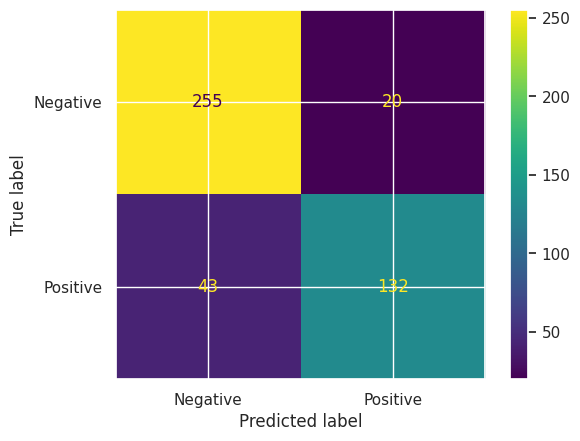

Ture negative : 255
False positive : 20
False negative : 43
True positive : 132


In [98]:


ConfusionMatrixDisplay(confusion_matrix(y_test,predictions),display_labels=['Negative','Positive']).plot()
plt.show()

TN,FP,FN,TP = confusion_matrix(y_test,predictions).ravel()
print('Ture negative :', TN)
print('False positive :', FP)
print('False negative :', FN)
print('True positive :', TP)

### 7. Prediction on New Data

This section is about to uses the previously trained Support Vector Machine (svm_model) to make a prediction on new, unseen data that we will randomly create.

In [82]:
# This function creates and returns a NumPy array containing eight random values.
# Each value is generated to simulate different features of a patient's data,
# which would typically be used to test the trained machine learning model with new, hypothetical data.

def generate_list():
    return np.array([
        np.random.randint(0, 100),
        np.random.randint(0, 2),
        np.random.uniform(10, 20),
        np.random.randint(0, 2),
        np.random.randint(0, 2),
        np.random.uniform(5, 10),
        np.random.uniform(3, 6),
        np.random.randint(0, 2)
    ])

In [83]:
# reshaping the numpy array with random values in order to obtain
# the same shape with the data where the model has been trained.

nr = generate_list().reshape(1,-1)

nr

array([[72.        ,  1.        , 18.2736733 ,  1.        ,  0.        ,
         5.85077486,  3.30559002,  0.        ]])

In [84]:
nr.shape

(1, 8)

In [85]:
# this line essentially answers the question:
#"Based on these new patient characteristics,
# what does our model predict regarding their cancer diagnosis?"


new_predictions = svm_model.predict(nr)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [86]:
# and here we have the answer.

new_predictions

array([1])

In conclusion,this notebook demonstrates a complete machine learning workflow for cancer diagnosis using a Support Vector Classifier (SVC) with a linear kernel. After loading and exploring the dataset, the data was split into training and testing sets. The SVC model was trained and subsequently evaluated, achieving an overall accuracy of 86.0%. While the model performed well in identifying patients without cancer, it exhibited a higher rate of False Negatives (43 cases) for actual cancer diagnoses. This highlights a common challenge in medical diagnosis, where minimizing false negatives is critical, and suggests that further model refinement or exploration of other robust models might be beneficial for this particular application.